<a href="https://colab.research.google.com/github/stpcoder/AiChatBot/blob/main/csvFileMake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[모두의 대화👂] 학습준비 - 데이터 파일 가공하기**
AiHub 의 **[소상공인 고객 주문 질의-응답 텍스트]('https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=102')**을 의도에 맞게 가공했습니다 <br/>

데이터를 크게 **발화 / 의도** 로 행이 구분되어 있도록 처리했습니다 </br>

또한, 의도는 크게 **(큰 범주의 의도) _ (세부적인 범주의 의도) _ (발화 목적)** 순으로 구성되어 있어, <br/> 

AI 의 다양한 학습을 위해 데이터를 크게 **다음과 같이 구분**했습니다. <br/>

1. **first-intend** 기반의 의도 파악 <br/>
결제, 배송 등과 같이 발화의 전반적인 분위기 파악을 위한 데이터

2. **first/second-intend** 기반의 의도 파악 <br/>
결제_취소, 결제_변경 등과 같이 세부적인 목적과 결합된 세부 의도 파악을 위한 데이터

3. **third-intent** 기반의 의도 파악 <br/>
확인, 질문 등과 같이 발화의 목적이 아닌 말투 및 의도 파악을 위한 데이터 

## PART 0. **데이터 전처리 사전준비**
### 데이터를 이용 목적에 따라 전처리를 하기 전, 준비 과정을 거쳤습니다

[1] 데이터를 불러오기 위해 **구글 드라이브**에 연결했습니다

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[2] **데이터 가공에 필요한 모듈**들을 불러왔습니다

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import csv
import os
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

[3] 가공할 데이터 **파일 리스트 불러오기**

In [ ]:
fileDir = '/content/drive/MyDrive/Colab Notebooks/data'
fileList = os.listdir(fileDir)
fileList = fileList[2:]

for i, file in enumerate(fileList):
    fileList[i] = fileDir + '/' + file

fileList

['/content/drive/MyDrive/Colab Notebooks/data/기타_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/디지털가전_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/병원_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/뷰티_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/생활잡화_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/슈퍼_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/음식점_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/식품_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/의류_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/출산육아_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/카페_train.csv',
 '/content/drive/MyDrive/Colab Notebooks/data/패션_train.csv']

[4] 읽어온 파일 이름들을 토대로 각 파일을 열어 **모든 데이터를 pandas dataframe** 의 형태로 합쳤습니다.

In [ ]:
allData = []
lenCnt = 0

for file in fileList:
    fields = ['발화문', '인텐트']
    df = pd.read_csv(file, skipinitialspace=True, error_bad_lines=False, usecols=fields)
    print("파일 이름 : ", file.split("/")[-1] , " 데이터 수 : ", len(df))
    allData.append(df)
    print(df.head(2))
    lenCnt += len(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  기타_train.csv  데이터 수 :  156399
                       발화문       인텐트
0        휴대폰 할인마트요 그 뒷골목 아  제품_일반_확인
1  샤워봉에 고정하는 거 그거 말씀하시는 거죠  제품_일반_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  디지털가전_train.csv  데이터 수 :  742995
                   발화문       인텐트
0               아 그래요?  제품_일반_확인
1  네 지금 이제품이 베스트 제품인데요  제품_일반_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  병원_train.csv  데이터 수 :  128155
                                                 발화문       인텐트
0  그래서 그럴수도 있겠네요 정형외과 약을 많이 드시면 위가 상해서 역류할 순 있거든요...  제품_일반_확인
1                                                  네  제품_일반_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  뷰티_train.csv  데이터 수 :  249634
                       발화문       인텐트
0  고객님 어떤 마사리로 하실지 상담받으셨죠?  제품_일반_확인
1            네 지난주에 상담받았어요  제품_일반_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  생활잡화_train.csv  데이터 수 :  652520
                                                 발화문       인텐트
0                                           어찌된 건가요?  제품_일반_확인
1  문의 주셔서 감사합니다. 안타깝게도 2건 이상 구매 시 추가 증정 확인되며 중복 증...  제품_일반_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  슈퍼_train.csv  데이터 수 :  271723
                                                 발화문       인텐트
0  서울이요? 기본 중량같은 경우에 기본요금이 이천육백원이거든요 근데 서울은 외지라서 ...  배송_비용_질문
1                                       여기 얼마이상 배달되요  배송_비용_질문


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  음식점_train.csv  데이터 수 :  290387
                       발화문       인텐트
0    참치타다끼샐러드는 취소했었는데, 맞죠?  주문_취소_확인
1  네, 참치타다끼샐러드는 취소된 상태입니다.  주문_취소_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  식품_train.csv  데이터 수 :  434312
                                                 발화문       인텐트
0  컵밥 2만원 이상을 사면 무료 배송으로 아는데 여기가 죽도 추가로 몇 개 더 주문해...  배송_비용_질문
1    박스에 합포가 되지 않을 수도 있어 정확한 답변 드리지 못하는 점 양해 부탁드립니다.  배송_비용_질문


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  의류_train.csv  데이터 수 :  419428
                                                 발화문       인텐트
0                   아침도 아니고 밤 12시 30분에 결제한 건데도 그런가요?  주문_취소_확인
1  네 저희가 보통 그날 12시에 발주 마감이여서요 일단 내일 물건 오는 대로 보내드릴게요.  주문_취소_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  출산육아_train.csv  데이터 수 :  358712
                                                 발화문       인텐트
0  각각 두 번 주문, 결재하여 하나는 취소요청했어요 나머지 하나 주문만 발송되는 거 맞죠?  주문_취소_확인
1    주문해주신 리얼소프트 밴드 특대형 4팩 금일 오전 중 정상 출고된 것으로 확인됩니다.  주문_취소_확인


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  카페_train.csv  데이터 수 :  169633
                   발화문       인텐트
0  고객님 혹시 무슨 문제 있으신가요?  제품_불량_질문
1               네 이상해요  제품_불량_질문


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


파일 이름 :  패션_train.csv  데이터 수 :  200777
                    발화문       인텐트
0  여닫이문의 높이가 다른데 하자인가요?  제품_불량_질문
1  하자가 아닙니다. 다시 고정해드릴게요  제품_불량_질문


## PART 1. **first-intend 데이터 전처리**

### 다소 큰 범위로 분류된 **intent의 first type에 맞춰** 데이터를 분류했습니다

[1] 위에서 array로 allData에 저장된 파일을 **dataframe으로 불러왔습니다**

In [ ]:
dataCombine = pd.concat(allData) #dataframe 형식으로 변환

[2] 데이터에서 분류된 **모든 first-intent**를 알아보았습니다

In [ ]:
forCheck = set()
for data in dataCombine.인텐트.unique():
    forCheck.add(data.split("_")[0]) #first-intent set 생성
print(forCheck)

{'매장', '부가서비스', 'AS', '구매', '수술|입퇴원', '주문', '멤버십', '행사', '수납', '예약', '결제', '제품', '포장', '외래', '교환|반품|환불', '웹사이트', '배송'}


[3] 데이터 중 이용하고자 하는 **소상공인과 관련이 없는 intent**를 가진 행들을 삭제하였습니다.

In [ ]:
print("------------------------삭제될 intent----------------------")
deleteList = ['수술|입퇴원', '부가서비스', '행사', '외래', '웹사이트', '멤버십', '수납', 'AS']
deleteKeyList = []
everyKeyList = dataCombine.인텐트.unique()
for deleteElement in deleteList: #각 원소별로 반복하며 제거
    checkList = [ i for i in everyKeyList if i.startswith(deleteElement) == True ]
    print(deleteElement, ' : ', checkList)
    for check in checkList:
        mask = dataCombine['인텐트'].isin([check]) #특정 intent를 가진 row의 loc을 mask에 저장
        dataCombine = dataCombine[~mask] #mask 에 해당하지 않은 데이터만 추출

print("\n-------------필요없는 intent 제거 후 남은 intent-----------")        
forCheck = set()
for data in dataCombine.인텐트.unique():
    forCheck.add(data.split("_")[0]) #남아있는 intent들만 추출
print(forCheck)

------------------------삭제될 intent----------------------
수술|입퇴원  :  ['수술|입퇴원_생활_질문', '수술|입퇴원_방법_질문', '수술|입퇴원_비용_질문', '수술|입퇴원_비용_요청', '수술|입퇴원_정보_질문', '수술|입퇴원_예약_요청', '수술|입퇴원_정보_요청', '수술|입퇴원_예약_질문', '수술|입퇴원_방법_요청', '수술|입퇴원_생활_요청']
부가서비스  :  ['부가서비스_날짜_요청', '부가서비스_비용_요청', '부가서비스_방법_질문', '부가서비스_방법_요청', '부가서비스_비용_질문', '부가서비스_날짜_질문']
행사  :  ['행사_기간_확인', '행사_일반_요청', '행사_기간_질문', '행사_유형_요청', '행사_유형_확인', '행사_일반_질문', '행사_일반_확인', '행사_유형_질문', '행사_기간_요청', '행사_날짜_요청', '행사_정보_질문', '행사_날짜_질문', '행사_유형_비교', '행사_기간_비교', '행사_일반_비교', '행사_정보_요청', '행사_정보_확인', '행사_정보_비교', '행사_날짜_확인']
외래  :  ['외래_시간_질문', '외래_예약_요청', '외래_방법_질문', '외래_방법_요청', '외래_예약_질문', '외래_시간_요청', '외래_비용_요청', '외래_비용_질문', '외래_정보_요청', '외래_정보_질문']
웹사이트  :  ['웹사이트_가입_요청', '웹사이트_사용_확인', '웹사이트_사용_요청', '웹사이트_사용_질문', '웹사이트_가입_질문', '웹사이트_오류_질문', '웹사이트_오류_비교', '웹사이트_오류_확인', '웹사이트_오류_요청', '웹사이트_사용_비교', '웹사이트_가입_확인']
멤버십  :  ['멤버십_사용_요청', '멤버십_오류_요청', '멤버십_일반_요청', '멤버십_일반_비교', '멤버십_적립_요청', '멤버십_사용_확인', '멤버십_가입_질문', '멤버십_사용_질문', '멤버십_일반_확인', '멤버십_일반_질문', '멤버

[4] 이용하는 first-intent 중 세부 사항으로 구분된 항목들을 **index 의 숫자들로 파싱**했습니다

In [ ]:
chgList = ['결제' , '배송' , '예약', '제품', '주문', '포장', '구매', '교환|반품|환불', '매장']
chgKeyList = []
everyKeyList = dataCombine.인텐트.unique()

for i, chgElement in enumerate(chgList):
    checkList = [ i for i in everyKeyList if i.startswith(chgElement) == True ] #first-intent 를 가진 value들의 list 생성
    print(chgElement, ' : ', checkList)
    for check in checkList:
        mask = dataCombine['인텐트'].isin([check]) #특정 intent를 가진 원소들의 mask 생성
        dataCombine['인텐트'][mask] = i #index에 해당하는 숫자로 대체

결제  :  ['결제_일반_질문', '결제_추가_요청', '결제_할인_질문', '결제_수단_질문', '결제_일반_확인', '결제_일반_요청', '결제_수단_요청', '결제_일반_비교', '결제_오류_질문', '결제_재결제_확인', '결제_방식_확인', '결제_영수증_확인', '결제_취소_질문', '결제_취소_요청', '결제_할인_요청', '결제_시기_요청', '결제_할인_확인', '결제_추가_확인', '결제_시기_질문', '결제_수단_비교', '결제_영수증_질문', '결제_할인_비교', '결제_추가_질문', '결제_재결제_질문', '결제_영수증_요청', '결제_재결제_요청', '결제_수단_확인', '결제_방식_요청', '결제_방식_질문', '결제_추가_비교', '결제_시기_확인', '결제_오류_비교', '결제_방식_비교', '결제_오류_요청', '결제_오류_확인', '결제_시기_비교', '결제_취소_확인']
배송  :  ['배송_택배사_질문', '배송_날짜_요청', '배송_오류_질문', '배송_비용_확인', '배송_날짜_질문', '배송_방법_확인', '배송_일반_확인', '배송_방법_비교', '배송_비용_질문', '배송_날짜_확인', '배송_방법_질문', '배송_일반_요청', '배송_지역_요청', '배송_방법_요청', '배송_지역_확인', '배송_비용_요청', '배송_일반_질문', '배송_지역_질문', '배송_날짜_비교', '배송_택배사_확인', '배송_택배사_요청', '배송_비용_비교', '배송_오류_확인', '배송_오류_요청', '배송_일반_비교', '배송_택배사_비교', '배송_오류_비교']
예약  :  ['예약_취소_질문', '예약_취소_요청', '예약_방법_확인', '예약_취소_확인', '예약_비용_요청', '예약_방법_요청', '예약_변경_질문', '예약_변경_요청', '예약_비용_질문', '예약_변경_확인', '예약_방법_질문', '예약_비용_확인']
제품  :  ['제품_일반_확인', '제품_추천_질문', '제품_용도_확인', '제품_구성_비교'

[5] 인공지능의 학습 중 오류 제거를 위해 **특수문자를 제거**하고 학습 시간을 위해 **발화문의 길이를 64로 제한**했습니다

In [ ]:
dataCombine["발화문"] = dataCombine["발화문"].str.replace(pat=r'[^\w]', repl=r'', regex=True) #정규식을 활용하여 특수문자 제거
mask = dataCombine['발화문'].str.len() < 65 #발화문의 길이를 64자 이내로 제한하는 mask 생성
dataCombine = dataCombine.loc[mask] #mask를 사용한 길이 제한

[6] 올바른 학습이 진행되도록 각 value 별 row 의 개수를 **가장 작은 원소의 개수**로 통일했습니다

In [ ]:
minCnt = min(dataCombine.인텐트.value_counts())
dfList = []
for value in dataCombine.인텐트.unique():
  newDf = dataCombine[dataCombine['인텐트'] == value] #각 first-intent의 index에 해당하는 원소 리스트 생성
  newDf = newDf.sample(n=minCnt) #minCnt에 맞춰 데이터 추출
  dfList.append(newDf) #df 리스트에 생성된 각 df 추가
dataCombine = pd.concat(dfList, ignore_index=True)
dataCombine.인텐트.value_counts() #intent 별 맞춰진 개수를 확인

3    18704
7    18704
0    18704
5    18704
1    18704
6    18704
8    18704
4    18704
2    18704
Name: 인텐트, dtype: int64

[7] train 데이터의 수를 **60,000개로 맞추기 위해** **0.4 비율로 추출**했으며 train 과 test를 **4대 1로** 맞췄습니다

In [ ]:
randomState = random.randrange(1, 1000) #랜덤 시드를 위한 난수 생성
dataCombine = dataCombine.sample(frac=1)

firstTypeTrain = dataCombine.sample(frac=0.4, random_state=randomState) #개수를 위한 비율 맞추기
mask = dataCombine['발화문'].isin( firstTypeTrain['발화문'] )
dataCombine = dataCombine[~mask] #추출된 데이터를 제외한 데이터 선정
mask = dataCombine['발화문']
firstTypeTest = dataCombine.sample(frac=0.1, random_state=randomState) #새롭게 10프로 비율로 데이터 추출
print("train 개수 : ", len(firstTypeTrain), " test 개수 : ", len(firstTypeTest))

train 개수 :  67334  test 개수 :  9094


[8] train 과 test **모두 균일한 분포**를 맞춘 것을 확인할 수 있습니다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

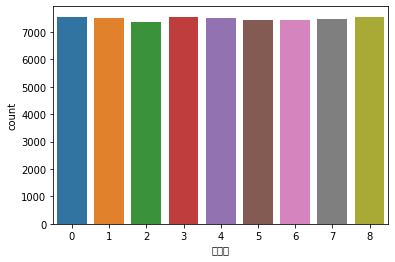

In [ ]:
fig, axe = plt.subplots(ncols=1)
sns.countplot(x = firstTypeTrain.인텐트)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

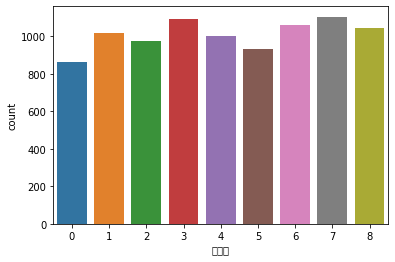

In [ ]:
fig, axe = plt.subplots(ncols=1)
sns.countplot(x = firstTypeTest.인텐트)

[9] 생성된 train 과 test dataframe 을 **tsv 형식의 파일로 저장**했습니다

In [ ]:
firstTypeTrain.to_csv('/content/drive/MyDrive/Colab Notebooks/result/firstTypeTrain.tsv', index=False, header=None, sep="\t")
firstTypeTest.to_csv('/content/drive/MyDrive/Colab Notebooks/result/firstTypeTest.tsv', index=False, header=None, sep="\t")

## PART 2. **first/second-intent** 데이터 전처리

### 큰 범주와 둘째 범주를 모두 포함하는 범위로 데이터를 전처리했습니다

[1] 위에서 array로 allData에 저장된 파일을 **dataframe으로 불러왔습니다**

In [ ]:
newDataCombine = pd.concat(allData) #dataframe 형식으로 변환

[2] 데이터에서 분류된 **모든 first/second-intent**를 알아보았습니다

In [ ]:
forCheck = set()
for data in newDataCombine.인텐트.unique():
    forCheck.add(data.split("_")[0]+ "_" + data.split("_")[1])
print(forCheck)

{'제품_입고', '제품_일반', '제품_날짜', '부가서비스_방법', '구매_추가', '구매_예약', '제품_용도', '예약_취소', '제품_방법', '주문_변경', '주문_비품', '멤버십_사용', '포장_비용', '포장_방식', '매장_부대시설', '결제_수단', '외래_시간', '배송_일반', '제품_소재', 'AS_비용', '결제_할인', '구매_오류', '구매_취소', '교환|반품|환불_날짜', '매장_이용', '예약_변경', 'AS_방법', '매장_정보', '행사_일반', '결제_일반', '교환|반품|환불_시간', '제품_정보', '웹사이트_가입', '제품_가격', '제품_구매', '행사_날짜', '주문_오류', '행사_정보', '결제_영수증', 'AS_시간', '교환|반품|환불_일반', '제품_구성', '교환|반품|환불_비용', 'AS_날짜', '결제_추가', '멤버십_일반', '제품_불량', '수납_원무', '부가서비스_날짜', '제품_커스텀', '외래_비용', '주문_제품', '수술|입퇴원_생활', '수술|입퇴원_비용', '배송_날짜', '수납_방법', '구매_변경', '제품_시용', '행사_기간', '주문_추가', '수술|입퇴원_방법', '제품_추천', '제품_품질', '결제_오류', '배송_지역', '웹사이트_사용', '멤버십_가입', '외래_예약', '배송_비용', '결제_방식', '결제_재결제', '교환|반품|환불_방법', '포장_일반', '제품_재고', '배송_방법', '수술|입퇴원_정보', 'AS_일반', '외래_방법', '멤버십_오류', '외래_정보', '부가서비스_비용', '매장_구조', '예약_비용', '결제_취소', '멤버십_적립', '행사_유형', '제품_원산지', '배송_오류', '구매_제품', '예약_방법', '배송_택배사', '주문_취소', '결제_시기', '웹사이트_오류', '수술|입퇴원_예약', '제품_호환'}


[3] 데이터 중 이용하고자 하는 **소상공인과 관련이 없는 intent**를 가진 행들을 삭제하였습니다.

In [ ]:
print("------------------------삭제될 intent----------------------")
deleteList = ['수술|입퇴원', '부가서비스', '행사', '외래', '웹사이트', '멤버십', '수납', 'AS', '교환|반품|환불']
deleteKeyList = []
everyKeyList = newDataCombine.인텐트.unique()
for deleteElement in deleteList: #각 원소별로 반복하며 제거
    checkList = [ i for i in everyKeyList if i.startswith(deleteElement) == True ]
    print(deleteElement, ' : ', checkList)
    for check in checkList:
        mask = newDataCombine['인텐트'].isin([check]) #특정 intent를 가진 row의 loc을 mask에 저장
        newDataCombine = newDataCombine[~mask] #mask 에 해당하지 않은 데이터만 추출

print("\n-------------필요없는 intent 제거 후 남은 intent-----------")        
forCheck = set()
for data in newDataCombine.인텐트.unique():
    forCheck.add(data.split("_")[0]) #남아있는 intent들만 추출
print(forCheck)

------------------------삭제될 intent----------------------
수술|입퇴원  :  ['수술|입퇴원_생활_질문', '수술|입퇴원_방법_질문', '수술|입퇴원_비용_질문', '수술|입퇴원_비용_요청', '수술|입퇴원_정보_질문', '수술|입퇴원_예약_요청', '수술|입퇴원_정보_요청', '수술|입퇴원_예약_질문', '수술|입퇴원_방법_요청', '수술|입퇴원_생활_요청']
부가서비스  :  ['부가서비스_날짜_요청', '부가서비스_비용_요청', '부가서비스_방법_질문', '부가서비스_방법_요청', '부가서비스_비용_질문', '부가서비스_날짜_질문']
행사  :  ['행사_기간_확인', '행사_일반_요청', '행사_기간_질문', '행사_유형_요청', '행사_유형_확인', '행사_일반_질문', '행사_일반_확인', '행사_유형_질문', '행사_기간_요청', '행사_날짜_요청', '행사_정보_질문', '행사_날짜_질문', '행사_유형_비교', '행사_기간_비교', '행사_일반_비교', '행사_정보_요청', '행사_정보_확인', '행사_정보_비교', '행사_날짜_확인']
외래  :  ['외래_시간_질문', '외래_예약_요청', '외래_방법_질문', '외래_방법_요청', '외래_예약_질문', '외래_시간_요청', '외래_비용_요청', '외래_비용_질문', '외래_정보_요청', '외래_정보_질문']
웹사이트  :  ['웹사이트_가입_요청', '웹사이트_사용_확인', '웹사이트_사용_요청', '웹사이트_사용_질문', '웹사이트_가입_질문', '웹사이트_오류_질문', '웹사이트_오류_비교', '웹사이트_오류_확인', '웹사이트_오류_요청', '웹사이트_사용_비교', '웹사이트_가입_확인']
멤버십  :  ['멤버십_사용_요청', '멤버십_오류_요청', '멤버십_일반_요청', '멤버십_일반_비교', '멤버십_적립_요청', '멤버십_사용_확인', '멤버십_가입_질문', '멤버십_사용_질문', '멤버십_일반_확인', '멤버십_일반_질문', '멤버

[4] 이용하는 first/second-intent 중 세부 사항으로 구분된 항목들을 **index 의 숫자들로 파싱**했습니다

In [ ]:
chgList = ['예약_취소', '제품_구성', '결제_할인', '배송_비용', '결제_취소', '주문_비품', '제품_방법', '예약_방법', '교환|반품|환불_일반', '제품_원산지', '제품_용도', '배송_날짜', '예약_비용', '결제_일반', '교환|반품|환불_비용', '제품_구매', '매장_부대시설', '결제_오류', '매장_정보', '결제_시기', '결제_수단', '제품_호환', '주문_추가', '구매_오류', '구매_취소', '제품_가격', '주문_제품', '제품_커스텀', '배송_오류', '결제_추가', '포장_일반', '결제_재결제', '제품_추천', '제품_재고', '배송_지역', '주문_변경', '제품_정보', '배송_일반', '결제_영수증', '제품_품질', '배송_방법', '결제_방식', '제품_입고', '교환|반품|환불_방법', '구매_변경', '교환|반품|환불_시간', '주문_오류', '포장_방식', '매장_이용', '구매_예약', '예약_변경', '포장_비용', '배송_택배사', '주문_취소', '구매_추가', '제품_불량', '제품_날짜', '구매_제품', '제품_일반', '매장_구조', '제품_시용', '제품_소재']
chgKeyList = []
everyKeyList = newDataCombine.인텐트.unique()

for i, chgElement in enumerate(chgList):
    checkList = [ i for i in everyKeyList if i.startswith(chgElement) == True ] #first/second-intent 를 가진 value들의 list 생성
    print(chgElement, ' : ', checkList)
    for check in checkList:
        mask = newDataCombine['인텐트'].isin([check]) #특정 intent를 가진 원소들의 mask 생성
        newDataCombine['인텐트'][mask] = i #index에 해당하는 숫자로 대체

예약_취소  :  ['예약_취소_질문', '예약_취소_요청', '예약_취소_확인']
제품_구성  :  ['제품_구성_비교', '제품_구성_요청', '제품_구성_질문', '제품_구성_확인']
결제_할인  :  ['결제_할인_질문', '결제_할인_요청', '결제_할인_확인', '결제_할인_비교']
배송_비용  :  ['배송_비용_확인', '배송_비용_질문', '배송_비용_요청', '배송_비용_비교']
결제_취소  :  ['결제_취소_질문', '결제_취소_요청', '결제_취소_확인']
주문_비품  :  ['주문_비품_확인', '주문_비품_질문', '주문_비품_요청']
제품_방법  :  ['제품_방법_확인', '제품_방법_요청', '제품_방법_질문', '제품_방법_비교']
예약_방법  :  ['예약_방법_확인', '예약_방법_요청', '예약_방법_질문']
교환|반품|환불_일반  :  []
제품_원산지  :  ['제품_원산지_비교', '제품_원산지_질문', '제품_원산지_확인', '제품_원산지_요청']
제품_용도  :  ['제품_용도_확인', '제품_용도_요청', '제품_용도_비교', '제품_용도_질문']
배송_날짜  :  ['배송_날짜_요청', '배송_날짜_질문', '배송_날짜_확인', '배송_날짜_비교']
예약_비용  :  ['예약_비용_요청', '예약_비용_질문', '예약_비용_확인']
결제_일반  :  ['결제_일반_질문', '결제_일반_확인', '결제_일반_요청', '결제_일반_비교']
교환|반품|환불_비용  :  []
제품_구매  :  ['제품_구매_요청', '제품_구매_질문']
매장_부대시설  :  ['매장_부대시설_요청', '매장_부대시설_확인', '매장_부대시설_질문']
결제_오류  :  ['결제_오류_질문', '결제_오류_비교', '결제_오류_요청', '결제_오류_확인']
매장_정보  :  ['매장_정보_질문', '매장_정보_요청', '매장_정보_확인', '매장_정보_비교']
결제_시기  :  ['결제_시기_요청', '결제_시기_질문', '결제_시기_

[5] 인공지능의 학습 중 오류 제거를 위해 **특수문자를 제거**하고 학습 시간을 위해 **발화문의 길이를 64로 제한**했습니다

In [ ]:
newDataCombine["발화문"] = newDataCombine["발화문"].str.replace(pat=r'[^\w]', repl=r'', regex=True) #정규식을 활용하여 특수문자 제거
mask = newDataCombine['발화문'].str.len() < 65 #발화문의 길이를 64자 이내로 제한하는 mask 생성
newDataCombine = newDataCombine.loc[mask] #mask를 사용한 길이 제한

[6] 올바른 학습이 진행되도록 각 value 별 row 의 개수를 **가장 작은 원소의 개수**로 통일했습니다

In [ ]:
minCnt = min(newDataCombine.인텐트.value_counts())
dfList = []
for value in newDataCombine.인텐트.unique():
  newDf = newDataCombine[newDataCombine['인텐트'] == value] #각 first/second-intent의 index에 해당하는 원소 리스트 생성
  newDf = newDf.sample(n=minCnt) #minCnt에 맞춰 데이터 추출
  dfList.append(newDf) #df 리스트에 생성된 각 df 추가
newDataCombine = pd.concat(dfList, ignore_index=True)
newDataCombine.인텐트.value_counts() #intent 별 맞춰진 개수를 확인

58    1334
23    1334
19    1334
40    1334
37    1334
34    1334
60    1334
27    1334
49    1334
18    1334
48    1334
57    1334
15    1334
59    1334
44    1334
32    1334
54    1334
16    1334
24    1334
53    1334
0     1334
35    1334
7     1334
46    1334
12    1334
5     1334
22    1334
50    1334
3     1334
4     1334
6     1334
38    1334
13    1334
10    1334
1     1334
30    1334
61    1334
42    1334
29    1334
9     1334
33    1334
2     1334
52    1334
11    1334
28    1334
51    1334
20    1334
56    1334
47    1334
25    1334
21    1334
39    1334
55    1334
17    1334
31    1334
41    1334
36    1334
26    1334
Name: 인텐트, dtype: int64

[7] train 데이터의 수를 **60,000개로 맞추기 위해** **0.4 비율로 추출**했으며 train 과 test를 **4대 1로** 맞췄습니다

In [ ]:
randomState = random.randrange(1, 1000) #랜덤 시드를 위한 난수 생성
newDataCombine = newDataCombine.sample(frac=1)

firstTypeTrain = newDataCombine.sample(frac=0.4, random_state=randomState) #개수를 위한 비율 맞추기
mask = newDataCombine['발화문'].isin( firstTypeTrain['발화문'] )
newDataCombine = newDataCombine[~mask] #추출된 데이터를 제외한 데이터 선정
mask = newDataCombine['발화문']
firstTypeTest = newDataCombine.sample(frac=0.1, random_state=randomState) #새롭게 10프로 비율로 데이터 추출
print("train 개수 : ", len(firstTypeTrain), " test 개수 : ", len(firstTypeTest))

train 개수 :  30949  test 개수 :  4272


[8] train 과 test **모두 균일한 분포**를 맞춘 것을 확인할 수 있습니다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

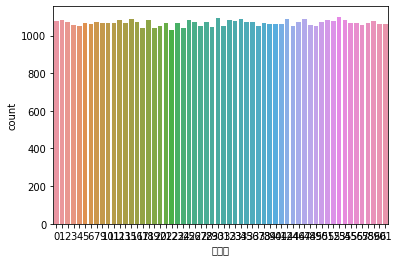

In [ ]:
fig, axe = plt.subplots(ncols=1)
sns.countplot(x = secondTypeTrain.인텐트)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

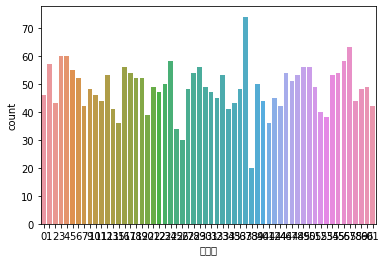

In [ ]:
fig, axe = plt.subplots(ncols=1)
sns.countplot(x = secondTypeTest.인텐트)

[9] 생성된 train 과 test dataframe 을 **tsv 형식의 파일로 저장**했습니다

In [ ]:
secondTypeTrain.to_csv('/content/drive/MyDrive/Colab Notebooks/result/secondTypeTrain.tsv', index=False, header=None, sep="\t")
secondTypeTest.to_csv('/content/drive/MyDrive/Colab Notebooks/result/secondTypeTest.tsv', index=False, header=None, sep="\t")

## PART 3. **third-intend 데이터 전처리**
### 데이터의 3번째 데이터인 발화의 intend third part를 판단하기 위한 데이터 전처리 과정입니다

[1] 초기에 열었던 파일에서 데이터를 불러왔습니다

In [ ]:
allNewDataCombine = pd.concat(allData) #초기 파일을 읽은 np array에서 dataframe 생성

[2] 3번째 부분에 위치한 **확인 / 비교 / 질문 / 요청 순대로 value 들을 수정**했습니다

In [ ]:
forCheck = set()
for data in allNewDataCombine.인텐트.unique():
    forCheck.add(data.split("_")[2]) #세번째 분류 항목들의 고유한 value를 저장
print(forCheck)

{'확인', '비교', '질문', '요청'}


[3] 각 value 값에 대응하는 **0 부터의 숫자로 인덱싱**을 매겼습니다

In [ ]:
chgList = ['확인', '비교', '질문', '요청'] #기준이 되는 value
chgKeyList = []
everyKeyList = allNewDataCombine.인텐트.unique() #인텐트 column 의 전체 value set

for i, chgElement in enumerate(chgList):
    checkList = [ i for i in everyKeyList if i.endswith(chgElement) == True ] #각 value 별 포함되는 원소 값 set 생성
    print(chgElement, ' : ', checkList)
    for check in checkList: #각 value 를 순회하며 전부 숫자로 변경
        mask = allNewDataCombine['인텐트'].isin([check]) #
        allNewDataCombine['인텐트'][mask] = i #chgList의 index에 맞춰 값을 변경

확인  :  ['제품_일반_확인', '제품_용도_확인', '행사_기간_확인', '포장_일반_확인', '제품_소재_확인', '교환|반품|환불_시간_확인', '포장_방식_확인', '제품_재고_확인', '웹사이트_사용_확인', '제품_가격_확인', '결제_일반_확인', '제품_원산지_확인', '결제_재결제_확인', '결제_방식_확인', '제품_품질_확인', '제품_정보_확인', '결제_영수증_확인', '제품_방법_확인', '멤버십_사용_확인', '교환|반품|환불_일반_확인', '배송_비용_확인', '배송_방법_확인', '포장_비용_확인', '결제_할인_확인', '교환|반품|환불_방법_확인', '결제_추가_확인', '배송_일반_확인', '제품_불량_확인', '멤버십_일반_확인', '제품_호환_확인', 'AS_시간_확인', 'AS_방법_확인', '멤버십_적립_확인', '제품_구성_확인', '행사_유형_확인', 'AS_일반_확인', '배송_날짜_확인', '멤버십_가입_확인', 'AS_비용_확인', '제품_추천_확인', '제품_날짜_확인', '행사_일반_확인', '배송_지역_확인', '결제_수단_확인', '제품_입고_확인', '결제_시기_확인', '배송_택배사_확인', '웹사이트_오류_확인', '교환|반품|환불_비용_확인', '결제_오류_확인', '배송_오류_확인', '결제_취소_확인', '웹사이트_가입_확인', '매장_정보_확인', '매장_이용_확인', '구매_제품_확인', '구매_변경_확인', '구매_추가_확인', '구매_오류_확인', '행사_정보_확인', '구매_취소_확인', '매장_부대시설_확인', '제품_시용_확인', '행사_날짜_확인', '주문_취소_확인', '주문_변경_확인', '예약_방법_확인', '예약_취소_확인', '주문_오류_확인', '멤버십_오류_확인', '주문_비품_확인', '예약_변경_확인', '주문_추가_확인', '예약_비용_확인', '주문_제품_확인', '제품_커스텀_확인']
비교  :  ['제품_구성_비교', '제품_원산지_비교', '제품_일

[4] 각 발화문에 있는 **특수문자들을 제거**하고 학습 시간을 조절하기 위해 **64자 이내**의 발화문만을 선정했습니다

In [ ]:
allNewDataCombine["발화문"] = allNewDataCombine["발화문"].str.replace(pat=r'[^\w]', repl=r'', regex=True) #특수문자 제거
mask = allNewDataCombine['발화문'].str.len() < 65 #길이 제한을 위한 mask
allNewDataCombine = allNewDataCombine.loc[mask] #길이 제한 덮어씌우기

[5] 학습의 정확도를 올리기 위해 각 **value 에 따른 row의 개수를 통일**했습니다

In [ ]:
minCnt = min(allNewDataCombine.인텐트.value_counts()) #제일 작은 원소의 개수에 맞춰 전체 data 정리
dfList = []
for value in allNewDataCombine.인텐트.unique():
  newDf = allNewDataCombine[allNewDataCombine['인텐트'] == value] #특정 번호에 해당하는 원소의 df 생성
  newDf = newDf.sample(n=minCnt) #작은 개수에 맞춰서 추출
  dfList.append(newDf) #각 value 별 추출된 df 를 list에 추가
allNewDataCombine = pd.concat(dfList, ignore_index=True) #합쳐서 다시 모으기
allNewDataCombine.인텐트.value_counts() #균일해진 개수 확인

0    36668
2    36668
3    36668
1    36668
Name: 인텐트, dtype: int64

[6] train set을 **60,000개** 수준으로 맞춰주며, train과 test를 **4대 1로** 맞췄습니다

In [ ]:
randomState = random.randrange(1, 1000) #랜덤 시드 생성
allNewDataCombine = allNewDataCombine.sample(frac=1) #순서 랜덤 배치

thirdTypeTrain = allNewDataCombine.sample(frac=0.4, random_state=randomState) #0.4 프로 추출
mask = allNewDataCombine['발화문'].isin( thirdTypeTrain['발화문'] ) #비복원 추출을 위한 마스크 생성
allNewDataCombine = allNewDataCombine[~mask] #추출된 원소 제거
thirdTypeTest = allNewDataCombine.sample(frac=0.1, random_state=randomState)
print("train 개수 : ", len(thirdTypeTrain), " test 개수 : ", len(thirdTypeTest))

train 개수 :  58669  test 개수 :  8048


[7] train 과 test **모두 균일한 분포**를 맞춘 것을 확인할 수 있습니다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

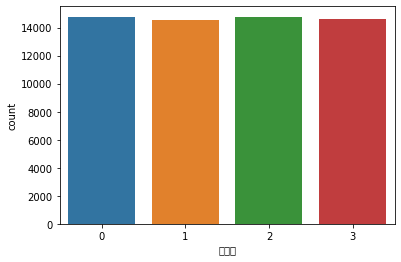

In [ ]:
fig, axe = plt.subplots(ncols=1)
sns.countplot(x = thirdTypeTrain.인텐트)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

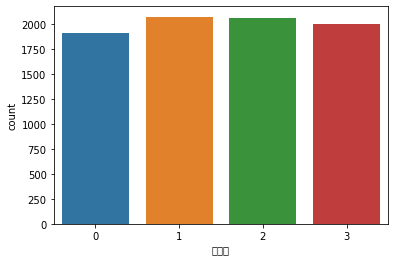

In [ ]:
fig, axe = plt.subplots(ncols=1)
sns.countplot(x = thirdTypeTest.인텐트)

[8] 추출된 train 과 test 데이터들을 **tsv 파일로 저장**했습니다 

In [ ]:
thirdTypeTrain.to_csv('/content/drive/MyDrive/Colab Notebooks/result/thirdTypeTrain.tsv', index=False, header=None, sep="\t")
thirdTypeTest.to_csv('/content/drive/MyDrive/Colab Notebooks/result/thirdTypeTest.tsv', index=False, header=None, sep="\t")